In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [3]:
cities = pd.read_csv("cities.csv")
product = pd.read_csv("product.csv")
sales = pd.read_csv("sales.csv", index_col=0, delimiter = ",")

In [4]:
sales

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,NaN,NaN
3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,NaN,NaN
4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,NaN,NaN
5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886054,S0143,P0676,2019-10-31,NaN,NaN,NaN,19.90,PR03,verylow,PR03,NaN,NaN,NaN
8886055,S0143,P0680,2019-10-31,NaN,NaN,NaN,139.90,PR14,NaN,PR03,NaN,NaN,NaN
8886056,S0143,P0694,2019-10-31,NaN,NaN,NaN,7.50,PR14,NaN,PR03,NaN,NaN,NaN
8886057,S0143,P0718,2019-10-31,NaN,NaN,NaN,23.75,PR14,NaN,PR03,NaN,NaN,NaN


In [5]:
# sales.set_index("date", inplace = True)
# sales

In [6]:
sales['date'] = pd.to_datetime(sales['date'])
sales_grouped = sales.set_index('date').groupby('store_id')["revenue"].resample("D").sum()
sales_grouped = sales_grouped.reset_index(level = "store_id", drop = False)
sales_grouped

,store_id,revenue
date,,
2017-01-02,S0002,171.59
2017-01-03,S0002,178.10
2017-01-04,S0002,303.89
2017-01-05,S0002,274.65
2017-01-06,S0002,193.81
...,...,...
2019-10-27,S0143,0.00
2019-10-28,S0143,0.00
2019-10-29,S0143,0.00


In [7]:
sales_grouped = sales_grouped.fillna(0)
sales_grouped = sales_grouped["2017-01-02":"2019-09-29"]
sales_grouped

,store_id,revenue
date,,
2017-01-02,S0002,171.59
2017-01-03,S0002,178.10
2017-01-04,S0002,303.89
2017-01-05,S0002,274.65
2017-01-06,S0002,193.81
...,...,...
2019-09-25,S0143,57.65
2019-09-26,S0143,110.57
2019-09-27,S0143,86.03


In [8]:
sales_transposed = sales_grouped.pivot(columns='store_id', values='revenue')
sales_transposed = sales_transposed.fillna(0)
sales_transposed

store_id,S0002,S0003,S0005,S0007,S0010,S0012,S0014,S0015,S0016,S0020,...,S0109,S0120,S0122,S0126,S0131,S0132,S0136,S0141,S0142,S0143
date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,171.59,67.47,0.00,0.00,364.99,68.52,216.67,308.69,70.06,734.50,...,0.00,48.20,73.35,504.48,71.12,183.10,0.0,37.30,48.33,40.08
2017-01-03,178.10,97.54,0.00,0.00,343.87,93.71,98.55,140.29,45.91,656.90,...,0.00,30.44,78.13,172.37,154.24,237.04,0.0,32.10,100.52,41.86
2017-01-04,303.89,74.23,0.00,0.00,346.01,144.84,105.01,178.98,36.68,736.59,...,0.00,35.60,76.00,459.48,122.09,192.77,0.0,62.55,74.14,25.65
2017-01-05,274.65,88.00,0.00,0.00,277.86,154.03,121.77,293.44,59.49,859.45,...,0.00,107.39,109.36,347.52,90.25,193.60,0.0,40.05,115.41,51.02
2017-01-06,193.81,101.94,0.00,0.00,346.19,186.03,138.19,266.45,65.36,962.60,...,0.00,29.46,111.47,353.00,80.45,225.87,0.0,48.63,82.24,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-25,370.82,167.38,291.17,240.99,327.70,191.16,115.90,239.40,92.66,833.75,...,201.10,41.60,176.61,437.95,164.66,346.27,0.0,61.68,189.15,57.65
2019-09-26,300.44,168.95,118.58,117.68,637.51,195.10,172.71,442.76,157.50,2348.52,...,344.82,81.21,787.58,1151.05,456.19,766.63,0.0,23.39,316.21,110.57
2019-09-27,529.17,175.33,131.61,143.93,486.55,202.88,217.22,424.13,77.71,1716.11,...,367.71,66.53,280.71,683.95,360.28,296.33,0.0,60.26,384.23,86.03


In [9]:
# X = sales_transposed.values
scaler = StandardScaler()
sales_transposed_std = scaler.fit_transform(sales_transposed)
sales_transposed_std

array([[-0.64342769, -0.4054506 , -0.4473102 , ..., -0.26491819,
        -0.69793185, -0.37016894],
       [-0.62957582, -0.19980798, -0.4473102 , ..., -0.41937037,
        -0.45459567, -0.32469897],
       [-0.36192201, -0.35922033, -0.4473102 , ...,  0.48506596,
        -0.57759257, -0.73878221],
       ...,
       [ 0.11742492,  0.33218201,  0.1307067 , ...,  0.41704759,
         0.86820386,  0.80362038],
       [ 5.14495037,  0.8693011 ,  0.5919871 , ...,  1.01584682,
         0.64076682,  3.95024428],
       [ 1.03277585,  0.86287263,  0.47771007, ..., -1.37281557,
         0.68161037,  3.00738109]])

In [10]:
pca = PCA()
pca.fit(sales_transposed_std)

PCA()

In [11]:
pca.explained_variance_ratio_

array([0.5362727 , 0.05003071, 0.04228669, 0.0344802 , 0.02551697,
       0.01690833, 0.0157141 , 0.01477091, 0.01362996, 0.01329001,
       0.01297812, 0.01202265, 0.01115217, 0.01049733, 0.00971126,
       0.00896472, 0.00875944, 0.00840133, 0.00793806, 0.00766307,
       0.00740649, 0.00698397, 0.00663319, 0.00627161, 0.00577714,
       0.00556022, 0.00534798, 0.00510871, 0.00491733, 0.0048451 ,
       0.00459917, 0.00448993, 0.00418801, 0.00396221, 0.00372625,
       0.00364998, 0.00351531, 0.0033876 , 0.00324766, 0.00317547,
       0.00308021, 0.00279345, 0.00271891, 0.0026668 , 0.00261598,
       0.00250681, 0.00235822, 0.0021524 , 0.00204951, 0.0020055 ,
       0.0019286 , 0.00187027, 0.00171316, 0.00163859, 0.00154368,
       0.00144861, 0.00125355, 0.00121987, 0.00111466, 0.00104085,
       0.00091323, 0.00084494, 0.00074015])

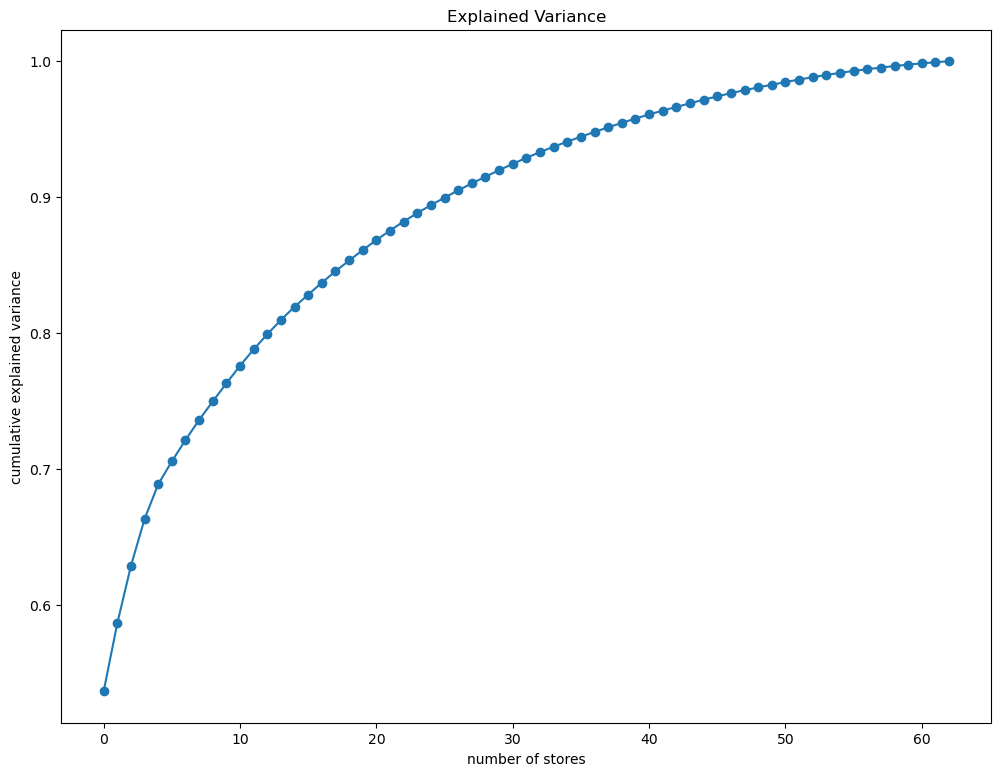

In [12]:
plt.figure(figsize=(12,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('number of stores')
plt.ylabel('cumulative explained variance')
plt.title("Explained Variance");

Around 30 components contain approximately 90% of the variance

In [13]:
pca = PCA(n_components = 6)
pca.fit(sales_transposed_std)

PCA(n_components=6)

In [14]:
component_index = 0  # Index of the first principal component
store_index = np.argmax(pca.components_[component_index])
store_id = sales_transposed.columns[store_index]
print("Store corresponding to the first principal component:", store_id)

Store corresponding to the first principal component: S0015


In [15]:
pca = PCA(n_components = 0.7)
X_pca = pca.fit_transform(sales_transposed_std) # this will fit and reduce dimensions
pca.n_components_ # one can print and see how many components are selected

6

In [16]:
n_pcs= pca.n_components_ # get number of component

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = sales_transposed.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

most_important_names

['S0015', 'S0136', 'S0076', 'S0099', 'S0141', 'S0083']

In [17]:
# Select the first six principal components
num_components = 6
selected_components = pca.components_[:num_components]

# Convert the selected components to a DataFrame
components_df = pd.DataFrame(selected_components.T, columns=[f"Component {i+1}" for i in range(num_components)])

# Calculate the correlation matrix
correlation_matrix = components_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             Component 1  Component 2  Component 3  Component 4  Component 5  \
Component 1     1.000000     0.031103     0.318040    -0.057652    -0.090016   
Component 2     0.031103     1.000000    -0.000865     0.000157     0.000245   
Component 3     0.318040    -0.000865     1.000000     0.001604     0.002504   
Component 4    -0.057652     0.000157     0.001604     1.000000    -0.000454   
Component 5    -0.090016     0.000245     0.002504    -0.000454     1.000000   
Component 6     0.276634    -0.000753    -0.007696     0.001395     0.002178   

             Component 6  
Component 1     0.276634  
Component 2    -0.000753  
Component 3    -0.007696  
Component 4     0.001395  
Component 5     0.002178  
Component 6     1.000000  


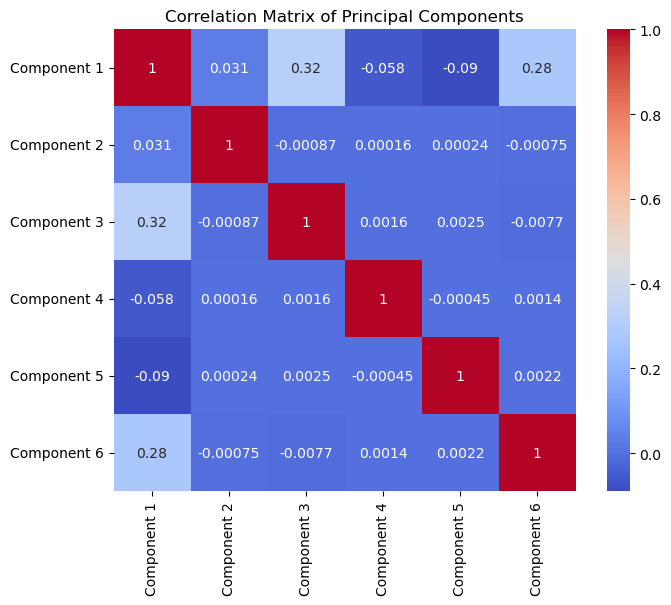

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Principal Components")
plt.show()

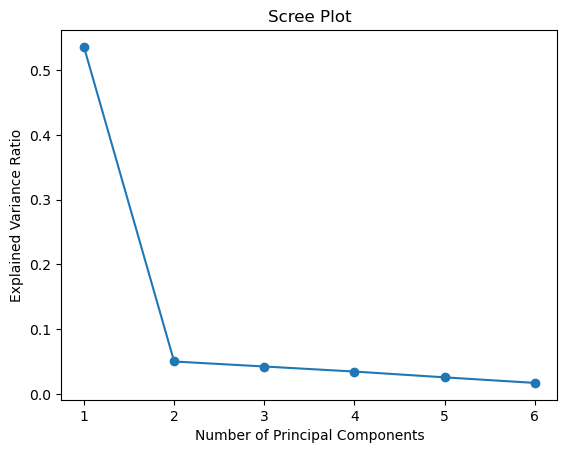

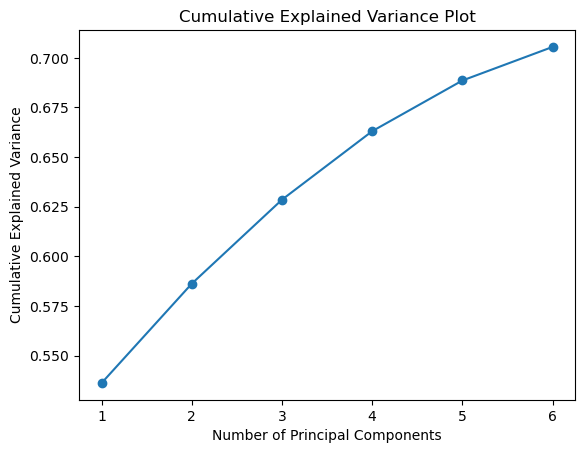

In [19]:
# Compute the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Compute the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

Each value represents the proportion of variance explained by the corresponding principal component. For example, the first principal component explains approximately 53.63% of the total variance in the data. The second principal component explains around 5.00% of the variance, the third explains about 4.23%, and so on.

This information is useful for understanding the relative importance of each principal component in capturing the variation in the data. You can use it to decide how many principal components to retain based on the desired level of variance explained.

In [20]:
# Perform PCA with 6 components
pca = PCA(n_components=6)
principal_components = pca.fit_transform(sales_transposed)

# Access the transformed data and variance explained by each component
transformed_data = pca.transform(sales_transposed)
explained_variance = pca.explained_variance_ratio_

# Print the variance explained by each component
for i, variance in enumerate(explained_variance):
    print(f"Variance explained by Component {i+1}: {variance:.4f}")

Variance explained by Component 1: 0.7366
Variance explained by Component 2: 0.1854
Variance explained by Component 3: 0.0225
Variance explained by Component 4: 0.0153
Variance explained by Component 5: 0.0055
Variance explained by Component 6: 0.0047


In [21]:
most_important_names

['S0015', 'S0136', 'S0076', 'S0099', 'S0141', 'S0083']

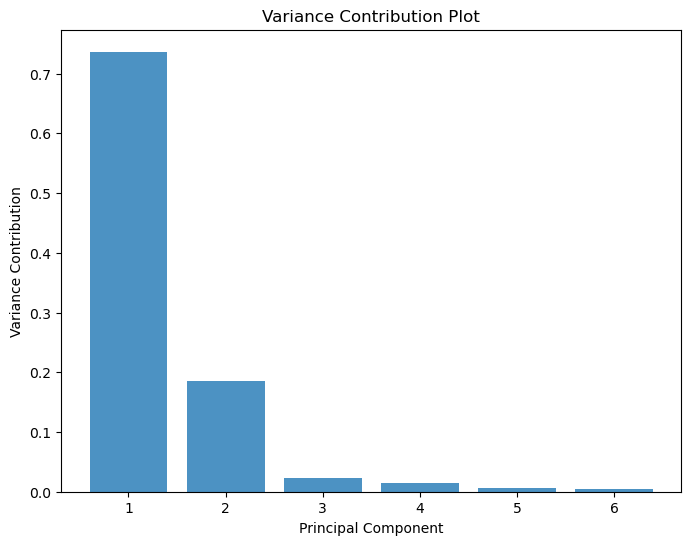

In [22]:
# Get the explained variance ratio from PCA
explained_variance_ratio = pca.explained_variance_ratio_

# Create a bar plot of the variance contribution
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.xlabel('Principal Component')
plt.ylabel('Variance Contribution')
plt.title('Variance Contribution Plot')
plt.show()

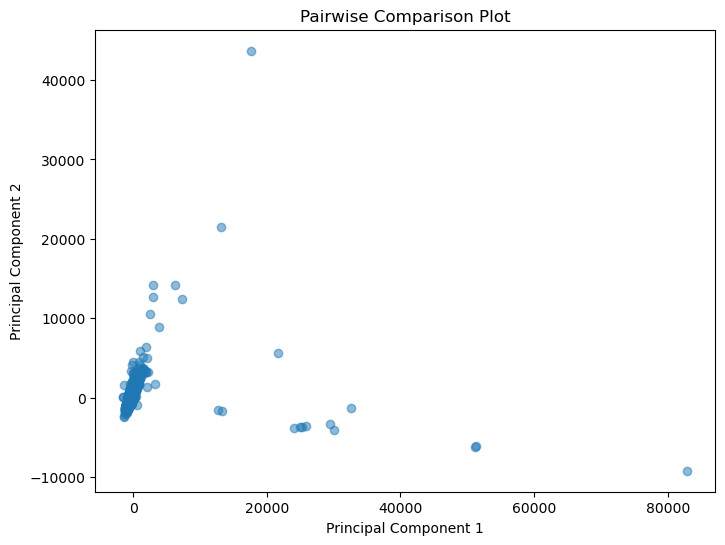

In [23]:
# Select two principal components for comparison
component1 = 1
component2 = 2

# Create a scatter plot of the variables against each other
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, component1-1], principal_components[:, component2-1], alpha=0.5)
plt.xlabel(f'Principal Component {component1}')
plt.ylabel(f'Principal Component {component2}')
plt.title('Pairwise Comparison Plot')
plt.show()

          S0015     S0136     S0076     S0099     S0141     S0083
S0015  1.000000  0.810341  0.494138 -0.039941  0.048421 -0.337203
S0136  0.810341  1.000000  0.533658 -0.029740  0.111858 -0.375552
S0076  0.494138  0.533658  1.000000  0.204749 -0.070546 -0.107389
S0099 -0.039941 -0.029740  0.204749  1.000000  0.069133 -0.107775
S0141  0.048421  0.111858 -0.070546  0.069133  1.000000  0.049750
S0083 -0.337203 -0.375552 -0.107389 -0.107775  0.049750  1.000000


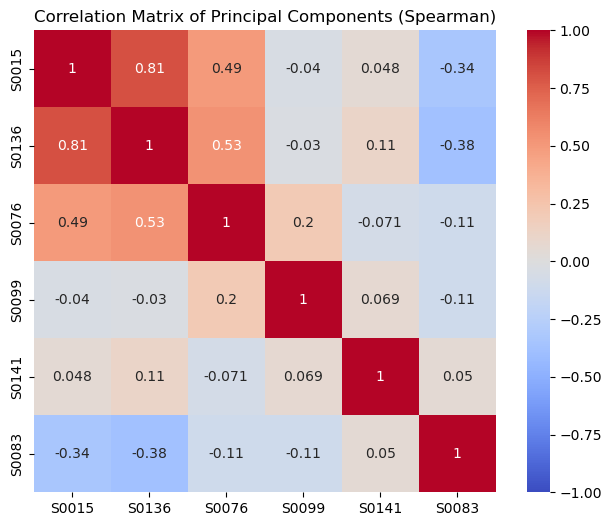

In [24]:
# Create a dataframe of the six principal components
principal_df = pd.DataFrame(principal_components[:, :6], columns=most_important_names)

# Calculate the correlation matrix using Pearson correlation coefficient
correlation_matrix = principal_df.corr(method = "spearman")

# Display the correlation matrix
print(correlation_matrix)

# Normalize the correlation matrix to range from -1 to 1
normalized_corr_matrix = correlation_matrix / correlation_matrix.abs().max()

# Create the heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix of Principal Components (Spearman)')
plt.show()

In [25]:
cities

,store_id,storetype_id,store_size,city_id_old,country_id,city_code
0,S0036,ST04,21,C001,TURKEY,Denizli
1,S0005,ST04,19,C001,TURKEY,Denizli
2,S0104,ST04,47,C002,TURKEY,Ankara
3,S0068,ST03,14,C003,TURKEY,?zmir
4,S0086,ST03,12,C003,TURKEY,?zmir
...,...,...,...,...,...,...
58,S0040,ST04,42,C017,TURKEY,Kahramanmaras
59,S0046,ST04,26,C017,TURKEY,Kahramanmaras
60,S0102,ST04,27,C018,TURKEY,Erzurum
61,S0032,ST03,14,C019,TURKEY,Van


In [26]:
print(most_important_names)
cities[cities["store_id"].isin(most_important_names)].sort_values(by=["store_id"])

['S0015', 'S0136', 'S0076', 'S0099', 'S0141', 'S0083']


,store_id,storetype_id,store_size,city_id_old,country_id,city_code
46,S0015,ST04,19,C014,TURKEY,Istanbul
42,S0076,ST03,11,C014,TURKEY,Istanbul
19,S0083,ST04,23,C010,TURKEY,Mersin
26,S0099,ST03,14,C014,TURKEY,Istanbul
9,S0136,ST03,12,C005,TURKEY,Antalya
7,S0141,ST03,12,C005,TURKEY,Antalya


In [27]:
sales_sum = sales_grouped.groupby("store_id").sum()
sales_sum = sales_sum.reset_index()
sales_sum_cut = sales_sum[sales_sum["store_id"].isin(most_important_names)]
sales_sum_cut.set_index("store_id", inplace = True)
sales_sum.set_index("store_id", inplace = True)

In [28]:
sales_sum_cut

,revenue
store_id,
S0015,351471.78
S0076,69951.10
S0083,114577.09
S0099,62692.75
S0136,27607.54
S0141,46265.32


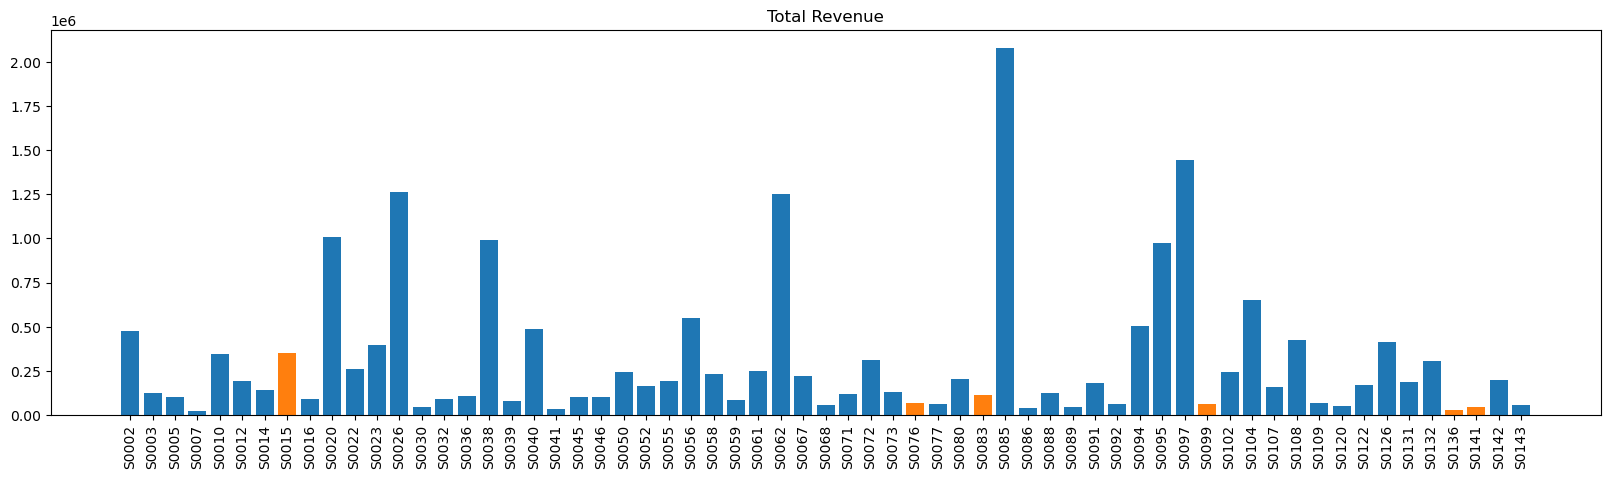

In [29]:
fig = plt.figure(figsize = (20,5))
plt.bar(sales_sum.index, sales_sum["revenue"])
plt.bar(sales_sum_cut.index, sales_sum_cut["revenue"])
plt.title("Total Revenue")
plt.xticks(sales_sum.index, rotation='vertical');

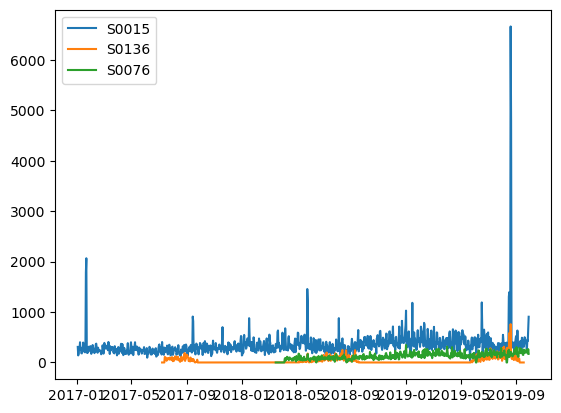

In [401]:
plt.plot(sales_grouped[sales_grouped["store_id"] == "S0015"].loc[:,"revenue"], label = "S0015")
plt.plot(sales_grouped[sales_grouped["store_id"] == "S0136"].loc[:,"revenue"], label = "S0136")
plt.plot(sales_grouped[sales_grouped["store_id"] == "S0076"].loc[:,"revenue"], label = "S0076")
plt.legend(loc='best');

In [30]:
sales_sum

,revenue
store_id,
S0002,474457.47
S0003,126883.59
S0005,101950.94
S0007,21746.68
S0010,346971.60
...,...
S0132,306331.81
S0136,27607.54
S0141,46265.32


# Use weekly sales instead

In [36]:
sales_weekly = sales.set_index('date').groupby('store_id')["revenue"].resample("W").sum()
sales_weekly = sales_weekly.reset_index(level = "store_id", drop = False)
sales_weekly

,store_id,revenue
date,,
2017-01-08,S0002,1813.24
2017-01-15,S0002,1896.91
2017-01-22,S0002,7404.16
2017-01-29,S0002,2078.39
2017-02-05,S0002,1745.47
...,...,...
2019-10-06,S0143,80.82
2019-10-13,S0143,0.00
2019-10-20,S0143,0.00


In [44]:
sales_weekly = sales_weekly.fillna(0)
sales_weekly = sales_weekly["2017-01-02":"2019-09-29"]
sales_weekly

,store_id,revenue
date,,
2017-01-08,S0002,1813.24
2017-01-15,S0002,1896.91
2017-01-22,S0002,7404.16
2017-01-29,S0002,2078.39
2017-02-05,S0002,1745.47
...,...,...
2019-09-01,S0143,629.58
2019-09-08,S0143,915.27
2019-09-15,S0143,507.08


In [45]:
sales_weekly_transposed = sales_weekly.pivot(columns='store_id', values='revenue')
sales_weekly_transposed = sales_weekly_transposed.fillna(0)
sales_weekly_transposed

store_id,S0002,S0003,S0005,S0007,S0010,S0012,S0014,S0015,S0016,S0020,...,S0109,S0120,S0122,S0126,S0131,S0132,S0136,S0141,S0142,S0143
date,,,,,,,,,,,,,,,,,,,,,
2017-01-08,1813.24,546.47,0.00,0.00,2475.73,814.01,993.04,1836.18,383.81,5425.20,...,0.00,325.49,701.85,2411.48,742.32,1721.17,0.00,225.35,632.62,324.74
2017-01-15,1896.91,616.72,0.00,0.00,2253.98,687.39,1095.39,1820.12,443.74,5513.45,...,0.00,359.36,617.95,1973.28,800.89,1487.98,0.00,181.40,701.95,283.71
2017-01-22,7404.16,1534.22,0.00,0.00,4756.89,2015.91,1773.96,4993.79,776.21,15843.21,...,0.00,646.64,1645.00,6660.95,1896.56,4759.32,0.00,339.02,2799.25,439.47
2017-01-29,2078.39,712.18,0.00,0.00,2073.69,684.00,765.66,1752.82,547.75,5227.45,...,0.00,284.25,653.81,1852.80,785.24,1193.41,0.00,264.07,869.88,369.49
2017-02-05,1745.47,731.45,0.00,0.00,2225.48,1144.61,916.63,1806.40,455.07,4370.59,...,0.00,397.29,555.82,1691.91,906.73,1553.15,0.00,256.18,910.30,324.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01,4164.56,1030.02,1177.18,867.30,2947.91,1349.81,1134.12,2545.12,587.25,9500.83,...,1765.57,373.66,1981.88,2607.85,1759.18,2754.96,657.46,237.38,1237.43,629.58
2019-09-08,6267.91,1302.61,1090.34,685.84,2749.20,1937.03,1389.82,2759.73,698.55,9153.79,...,1530.94,404.31,1992.27,3498.69,1735.58,3060.24,417.52,493.93,1281.46,915.27
2019-09-15,5007.57,1255.40,1239.80,892.32,2851.46,1965.89,1482.46,2664.79,905.45,9709.70,...,1425.80,615.17,1595.49,3408.88,1934.09,3712.46,0.00,315.22,1712.55,507.08


In [55]:
scaler = StandardScaler()
sales_weekly_transposed_std = scaler.fit_transform(sales_weekly_transposed)
sales_weekly_transposed_std

array([[-0.80936927, -0.63404227, -0.76945191, ..., -1.07160398,
        -0.9441959 , -0.39213026],
       [-0.76436201, -0.50335614, -0.76945191, ..., -1.55128637,
        -0.85732239, -0.67313176],
       [ 2.1980648 ,  1.20346978, -0.76945191, ...,  0.16902167,
         1.77068579,  0.39361925],
       ...,
       [ 0.90890552,  0.68478073,  0.56861527, ..., -0.09073808,
         0.4090034 ,  0.85665876],
       [-0.1308876 ,  0.84802212,  0.451073  , ...,  1.13318873,
         0.51155248,  1.50420182],
       [ 1.29656937,  0.61100121,  0.59881298, ...,  0.17873537,
         0.60179667,  2.21125995]])

In [56]:
pca_weekly = PCA()
pca_weekly.fit(sales_weekly_transposed_std)

PCA()

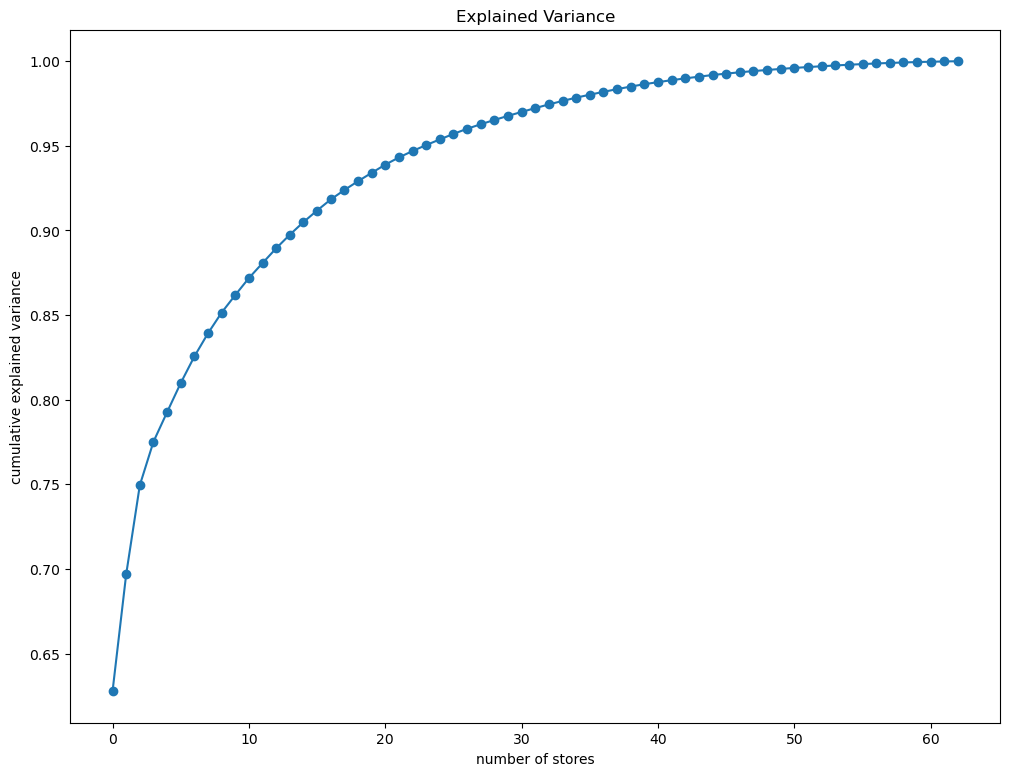

In [57]:
plt.figure(figsize=(12,9))
plt.plot(np.cumsum(pca_weekly.explained_variance_ratio_), marker='o')
plt.xlabel('number of stores')
plt.ylabel('cumulative explained variance')
plt.title("Explained Variance");

In [58]:
component_index = 0  # Index of the first principal component
store_index = np.argmax(pca_weekly.components_[component_index])
store_id = sales_weekly_transposed.columns[store_index]
print("Store corresponding to the first principal component:", store_id)

Store corresponding to the first principal component: S0050


In [61]:
pca_weekly = PCA(n_components = 0.7)
X_pca = pca_weekly.fit_transform(sales_weekly_transposed_std) # this will fit and reduce dimensions
pca_weekly.n_components_ # one can print and see how many components are selected

3

In [63]:
# Perform PCA with 3 components
pca_weekly = PCA(n_components=3)
principal_components = pca_weekly.fit_transform(sales_weekly_transposed)

# Access the transformed data and variance explained by each component
transformed_data = pca_weekly.transform(sales_weekly_transposed)
explained_variance = pca_weekly.explained_variance_ratio_

# Print the variance explained by each component
for i, variance in enumerate(explained_variance):
    print(f"Variance explained by Component {i+1}: {variance:.4f}")

Variance explained by Component 1: 0.5722
Variance explained by Component 2: 0.3203
Variance explained by Component 3: 0.0342


In [64]:
n_pcs= pca_weekly.n_components_ # get number of component

# get the index of the most important feature on EACH component
most_important = [np.abs(pca_weekly.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = sales_weekly_transposed.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

most_important_names

['S0097', 'S0085', 'S0085']

In [66]:
n_pcs= pca.n_components_ # get number of component

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = sales_transposed.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

most_important_names

['S0050',
 'S0136',
 'S0136',
 'S0041',
 'S0083',
 'S0097',
 'S0126',
 'S0040',
 'S0083',
 'S0041',
 'S0005',
 'S0097',
 'S0143',
 'S0077',
 'S0141',
 'S0141',
 'S0045',
 'S0016',
 'S0005',
 'S0045',
 'S0120',
 'S0102',
 'S0122',
 'S0136',
 'S0014',
 'S0089',
 'S0055',
 'S0038',
 'S0059',
 'S0073',
 'S0055',
 'S0056',
 'S0085',
 'S0052',
 'S0052',
 'S0088',
 'S0122',
 'S0023',
 'S0080',
 'S0085',
 'S0022',
 'S0039',
 'S0010',
 'S0094',
 'S0038',
 'S0023',
 'S0010',
 'S0020',
 'S0092',
 'S0088',
 'S0131',
 'S0072',
 'S0107',
 'S0050',
 'S0020',
 'S0015',
 'S0020',
 'S0071',
 'S0108',
 'S0067',
 'S0061',
 'S0104',
 'S0132']